<a href="https://colab.research.google.com/github/Arka1212/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.***

# **Feature descriptions briefly as follows:**

## **airline:** Name of the airline.
## **overall:** Overall point is given to the trip between 1 to 10.
## **author:** Author of the trip
## **reviewdate:** Date of the Review customer review: Review of the customers in free text format
## **aircraft:** Type of the aircraft
## **travellertype:** Type of traveler (e.g. business, leisure)
## **cabin:** Cabin at the flight date flown: Flight date
## **seatcomfort:** Rated between 1-5
## **cabin service:** Rated between 1-5
## **foodbev:** Rated between 1-5 entertainment: Rated between 1-5
## **groundservice:** Rated between 1-5
## **valueformoney:** Rated between 1-5
## **recommended:** Binary, target variable.




In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
from datetime import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset.
path = '/content/drive/MyDrive/Capstone Projects/Machine Learning (Classification)/Airline Passenger Referral Prediction/data_airline_reviews.xlsx'
df = pd.read_excel(path)

In [4]:
# Shape of the dataset.
df.shape

# ROWS = 131895 & COLUMNS = 17

(131895, 17)

In [5]:
# Glimpse of the dataset.
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Columns.
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [7]:
# Data description.
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Dataset information.
df.info()

# Seems that the dataset has a large number of missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [9]:
# Count of null or missing values.
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [10]:
df.isnull().sum().sum()

# So, dataset has 1326305 null values in total.

1326305

In [11]:
a_df = df.copy()

# Making a copy of the dataset so as to keep the original data intact.

## **DATA CLEANING & PRE-PROCESSING**

In [12]:
# Removing unnecessary columns.
airline_df = a_df.drop(['author','aircraft','date_flown','route','review_date','customer_review'],axis = 1)

# These columns does not have any significance in predictive analysis and also contains huge null values, so its been removed.

In [13]:
# Dropping null rows.
airline_df = airline_df.loc[~airline_df.isnull().all(axis=1),:]

# Removed rows with no values.

In [14]:
# New shape of the dataset.
airline_df.shape

# ROWS = 65947 & COLUMNS = 11

(65947, 11)

In [15]:
airline_df.isnull().sum()

# Still we have some missing values to deal with.

airline                0
overall             1930
traveller_type     26192
cabin               2644
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

In [16]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [17]:
# Dealing with null values in 'overall' column.
overall_median = airline_df['overall'].median()
airline_df['overall'] = airline_df['overall'].fillna(overall_median)

# Replaced all the null values with median value of the column.

In [18]:
# Dealing with null values in 'cabin' column.
cabin_mode = airline_df['cabin'].mode()
airline_df['cabin'] = airline_df['cabin'].fillna(cabin_mode)

# Replaced all the null values with mode value of the column.

In [19]:
# Dealing with null values in 'traveller_type' column.
tt_mode = airline_df['traveller_type'].mode()
airline_df['traveller_type'] = airline_df['traveller_type'].fillna(tt_mode)

# Replaced all the null values with mode value of the column.

In [20]:
# Dealing with null values in 'seat_comfort' column.
sc_median = airline_df['seat_comfort'].median()
airline_df['seat_comfort'] = airline_df['seat_comfort'].fillna(sc_median)

# Replaced all the null values with median value of the column.

In [21]:
# Dealing with null values in 'cabin_service' column.
cs_median = airline_df['cabin_service'].median()
airline_df['cabin_service'] = airline_df['cabin_service'].fillna(cs_median)

# Replaced all the null values with median value of the column.

In [22]:
# Dealing with null values in 'food_bev' column.
fb_median = airline_df['food_bev'].median()
airline_df['food_bev'] = airline_df['food_bev'].fillna(fb_median)

# Replaced all the null values with median value of the column.

In [23]:
# Dealing with null values in 'entertainment' column.
en_median = airline_df['entertainment'].median()
airline_df['entertainment'] = airline_df['entertainment'].fillna(en_median)

# Replaced all the null values with median value of the column.

In [24]:
# Dealing with null values in 'ground_service' column.
gs_median = airline_df['ground_service'].median()
airline_df['ground_service'] = airline_df['ground_service'].fillna(gs_median)

# Replaced all the null values with median value of the column.

In [25]:
# Dealing with null values in 'value_for_money' column.
vfm_median = airline_df['value_for_money'].median()
airline_df['value_for_money'] = airline_df['value_for_money'].fillna(vfm_median)

# Replaced all the null values with median value of the column.

In [26]:
# Removing null value rows from recommended(target variable) column.
airline_df = airline_df.dropna(subset=['recommended'])

In [27]:
airline_df.isnull().sum()

# Not upto the mark. Still some missing values are present in the dataset.

airline                0
overall                0
traveller_type     24686
cabin               1138
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
dtype: int64

In [28]:
# Removing the null value rows from 'cabin' column.
airline_df = airline_df.dropna(subset=['cabin'])

In [29]:
airline_df['traveller_type'] = airline_df['traveller_type'].fillna(method='ffill',axis = 0)

# Replaced the remaining null values via 'ffill' method.

In [30]:
airline_df.isnull().sum()

# So, the data got rid from missing values and ready for predictive analysis.

airline            0
overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

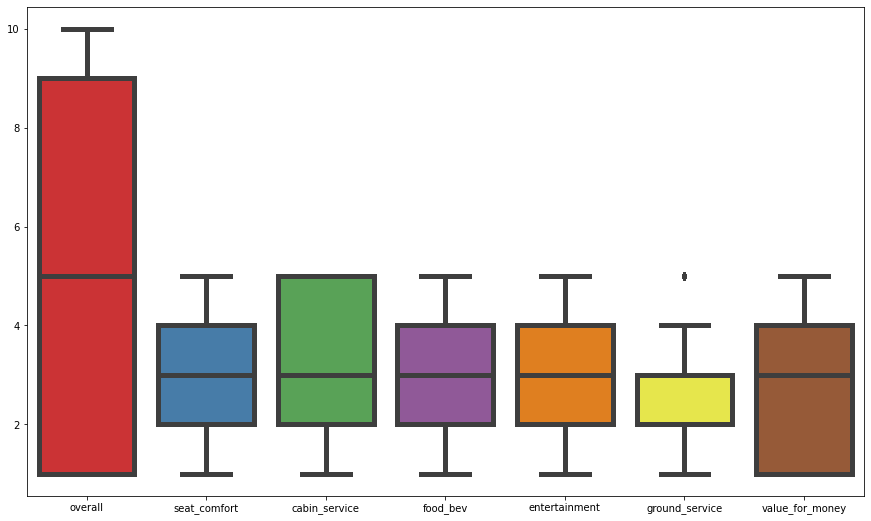

In [31]:
# Outlier detection.
plt.figure(figsize=(15,9))
sns.boxplot(data=airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']],linewidth=5,palette='Set1')
plt.show()

# No such outlier is visible in the dataset. Hence, dataset does not need outlier treatment and is ready for further analysis.

## **EXPLORATORY DATA ANALYSIS (EDA)**

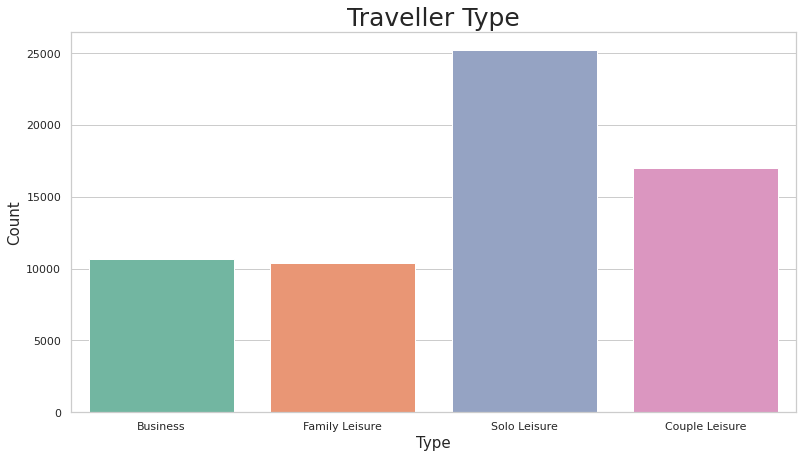

In [32]:
# Traveller type with most ratings.
plt.figure(figsize = (13,7))
sns.set_theme(style="whitegrid")
sns.countplot(airline_df['traveller_type'],palette="Set2")
plt.title('Traveller Type',fontsize = 25)
plt.xlabel('Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# Its clear from the countplot that 'Solo Leisure' has highest ratings among all whereas 'Family Leisure' has the least ratings.

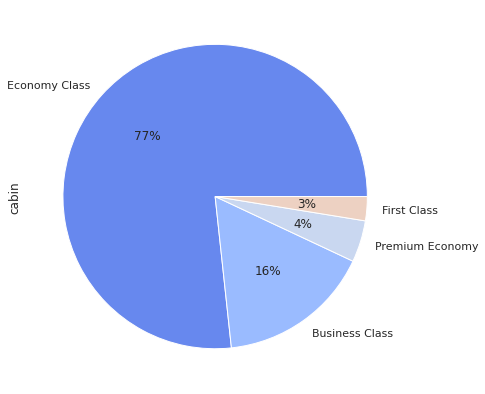

In [60]:
sns.set_palette('coolwarm')
airline_df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(13,7))
plt.show()

# 77% of the passengers are economy class traveller.

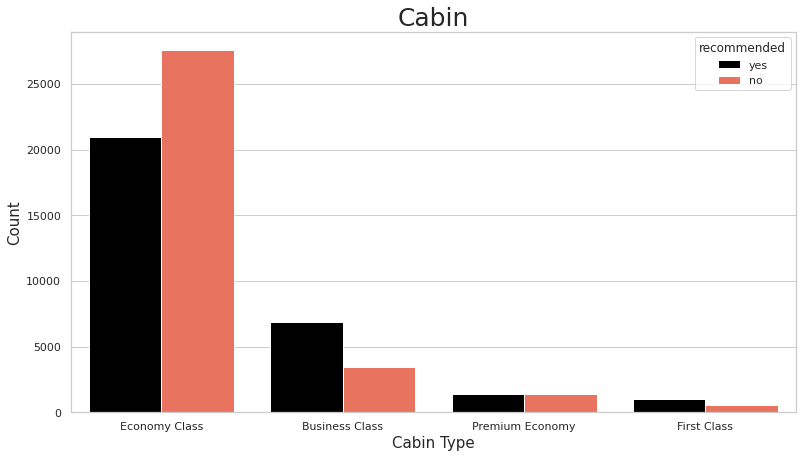

In [51]:
# Most recommended cabin.
plt.figure(figsize=(13,7))
sns.set_theme(style="whitegrid")
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'],palette= ['black','tomato'])
plt.title('Cabin',fontsize = 25)
plt.xlabel('Cabin Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# So, economy class has the most recommendation whereas first class has the least recommendation.

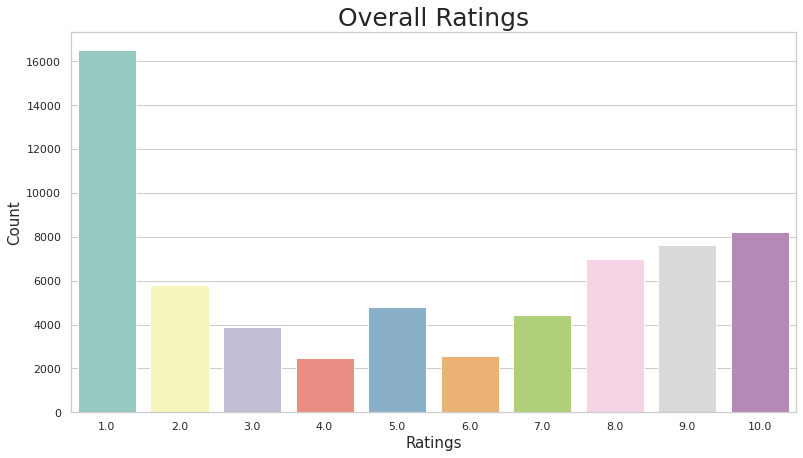

In [61]:
# Count of overall ratings.
plt.figure(figsize = (13,7))
sns.set_theme(style="whitegrid")
sns.countplot(airline_df['overall'],palette="Set3")
plt.title('Overall Ratings',fontsize = 25)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

# Most number of times 1 has been rated out of 10.
# So, focusing on the overall experience, it seems that most of the passengers are dissatisfied with the service.

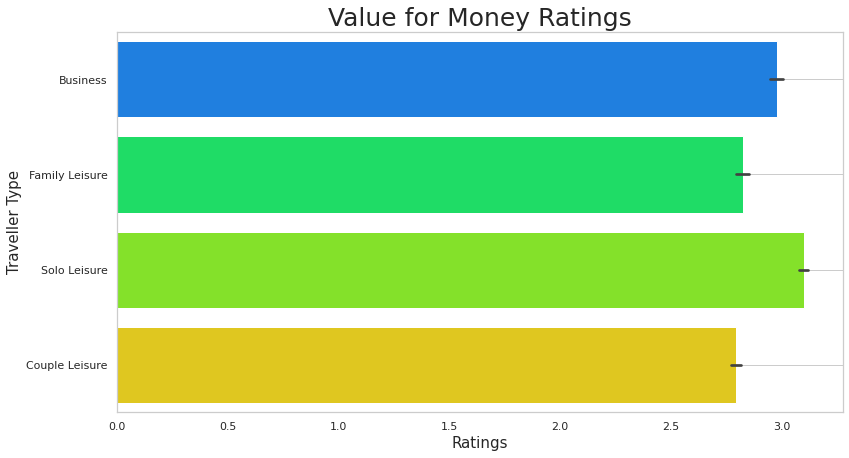

In [73]:
# Most value for money traveller type.
plt.figure(figsize=(13,7))
sns.set_palette('gist_ncar')
sns.barplot(y=airline_df['traveller_type'],x=airline_df['value_for_money'])
plt.title('Value for Money Ratings',fontsize=25)
plt.ylabel('Traveller Type',fontsize=15)
plt.xlabel('Ratings',fontsize=15)
plt.grid()
plt.show()

# According to the plot, Solo leisure has been the most value for money.